In [1]:
!pip install caer canaro

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

     |████████████████████████████████| 838 kB 1.3 MB/s 
     |████████████████████████████████| 21.6 MB 8.4 MB/s 
     |████████████████████████████████| 56.3 MB 218 kB/s 
/kaggle/input/schoolprojectdata/Project/JOSE/IMG-20210313-WA0059.jpg
/kaggle/input/schoolprojectdata/Project/JOSE/IMG-20210313-WA0038 - Copy (2).jpg
/kaggle/input/schoolprojectdata/Project/JOSE/20210325_230926 - Copy (2).jpg
/kaggle/input/schoolprojectdata/Project/JOSE/20210325_230940.jpg
/kaggle/input/schoolprojectdata/Project/JOSE/20210325_230307 - Copy.jpg
/kaggle/input/schoolprojectdata/Project/JOSE/20210325_230919 - Copy.jpg
/kaggle/input/schoolprojectdata/Project/JOSE/20210325_230341.jpg
/kaggle/input/schoolprojectdata/Project/JOSE/IMG-20210313-WA0128 - Copy - Copy.jpg
/kaggle/input/schoolprojectdata/Project/JOSE/20210325_230955.jpg
/kaggle/input/schoolprojectdata/Project/JOSE/IMG-20210313-WA0061 - Copy - Copy.jpg
/kaggle/input/schoolprojectdata/Project/JOSE/20210325_231016.jpg
/kaggle/input/schoolprojectdata/

In [2]:
import os
import caer
import canaro
import numpy as np
import cv2 as cv
import gc


In [3]:
IMG_SIZE = (100,100)
channels = 1
char_path = r'../input/schoolprojectdata/Project'


In [4]:
char_dict = {}
for char in os.listdir(char_path):
    char_dict[char] = len(os.listdir(os.path.join(char_path,char)))
    
char_dict = caer.sort_dict(char_dict,descending=True)
char_dict


[('JOSE', 788), ('PAUL', 542), ('PETER', 360)]

In [5]:
characters = []
count = 0
for i in char_dict:
    characters.append(i[0])
    count +=1
    if count >= 10:
        break
characters

['JOSE', 'PAUL', 'PETER']

In [6]:
train = caer.preprocess_from_dir(char_path, characters,channels=channels,IMG_SIZE=IMG_SIZE, isShuffle=True)


[INFO] Could not find a file to load from. Generating the training data
----------------------------------------------
1 - JOSE
2 - JOSE
3 - JOSE
4 - JOSE
5 - JOSE
6 - JOSE
7 - JOSE
8 - JOSE
9 - JOSE
10 - JOSE
11 - JOSE
12 - JOSE
13 - JOSE
14 - JOSE
15 - JOSE
16 - JOSE
17 - JOSE
18 - JOSE
19 - JOSE
20 - JOSE
21 - JOSE
22 - JOSE
23 - JOSE
24 - JOSE
25 - JOSE
26 - JOSE
27 - JOSE
28 - JOSE
29 - JOSE
30 - JOSE
31 - JOSE
32 - JOSE
33 - JOSE
34 - JOSE
35 - JOSE
36 - JOSE
37 - JOSE
38 - JOSE
39 - JOSE
40 - JOSE
41 - JOSE
42 - JOSE
43 - JOSE
44 - JOSE
45 - JOSE
46 - JOSE
47 - JOSE
48 - JOSE
49 - JOSE
50 - JOSE
51 - JOSE
52 - JOSE
53 - JOSE
54 - JOSE
55 - JOSE
56 - JOSE
57 - JOSE
58 - JOSE
59 - JOSE
60 - JOSE
61 - JOSE
62 - JOSE
63 - JOSE
64 - JOSE
65 - JOSE
66 - JOSE
67 - JOSE
68 - JOSE
69 - JOSE
70 - JOSE
71 - JOSE
72 - JOSE
73 - JOSE
74 - JOSE
75 - JOSE
76 - JOSE
77 - JOSE
78 - JOSE
79 - JOSE
80 - JOSE
81 - JOSE
82 - JOSE
83 - JOSE
84 - JOSE
85 - JOSE
86 - JOSE
87 - JOSE
88 - JOSE
89 - JOSE


/opt/conda/lib/python3.7/site-packages/caer/core.py:72: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return np.array(obj, dtype=dtype, order=order)


In [7]:
len(train)

1690

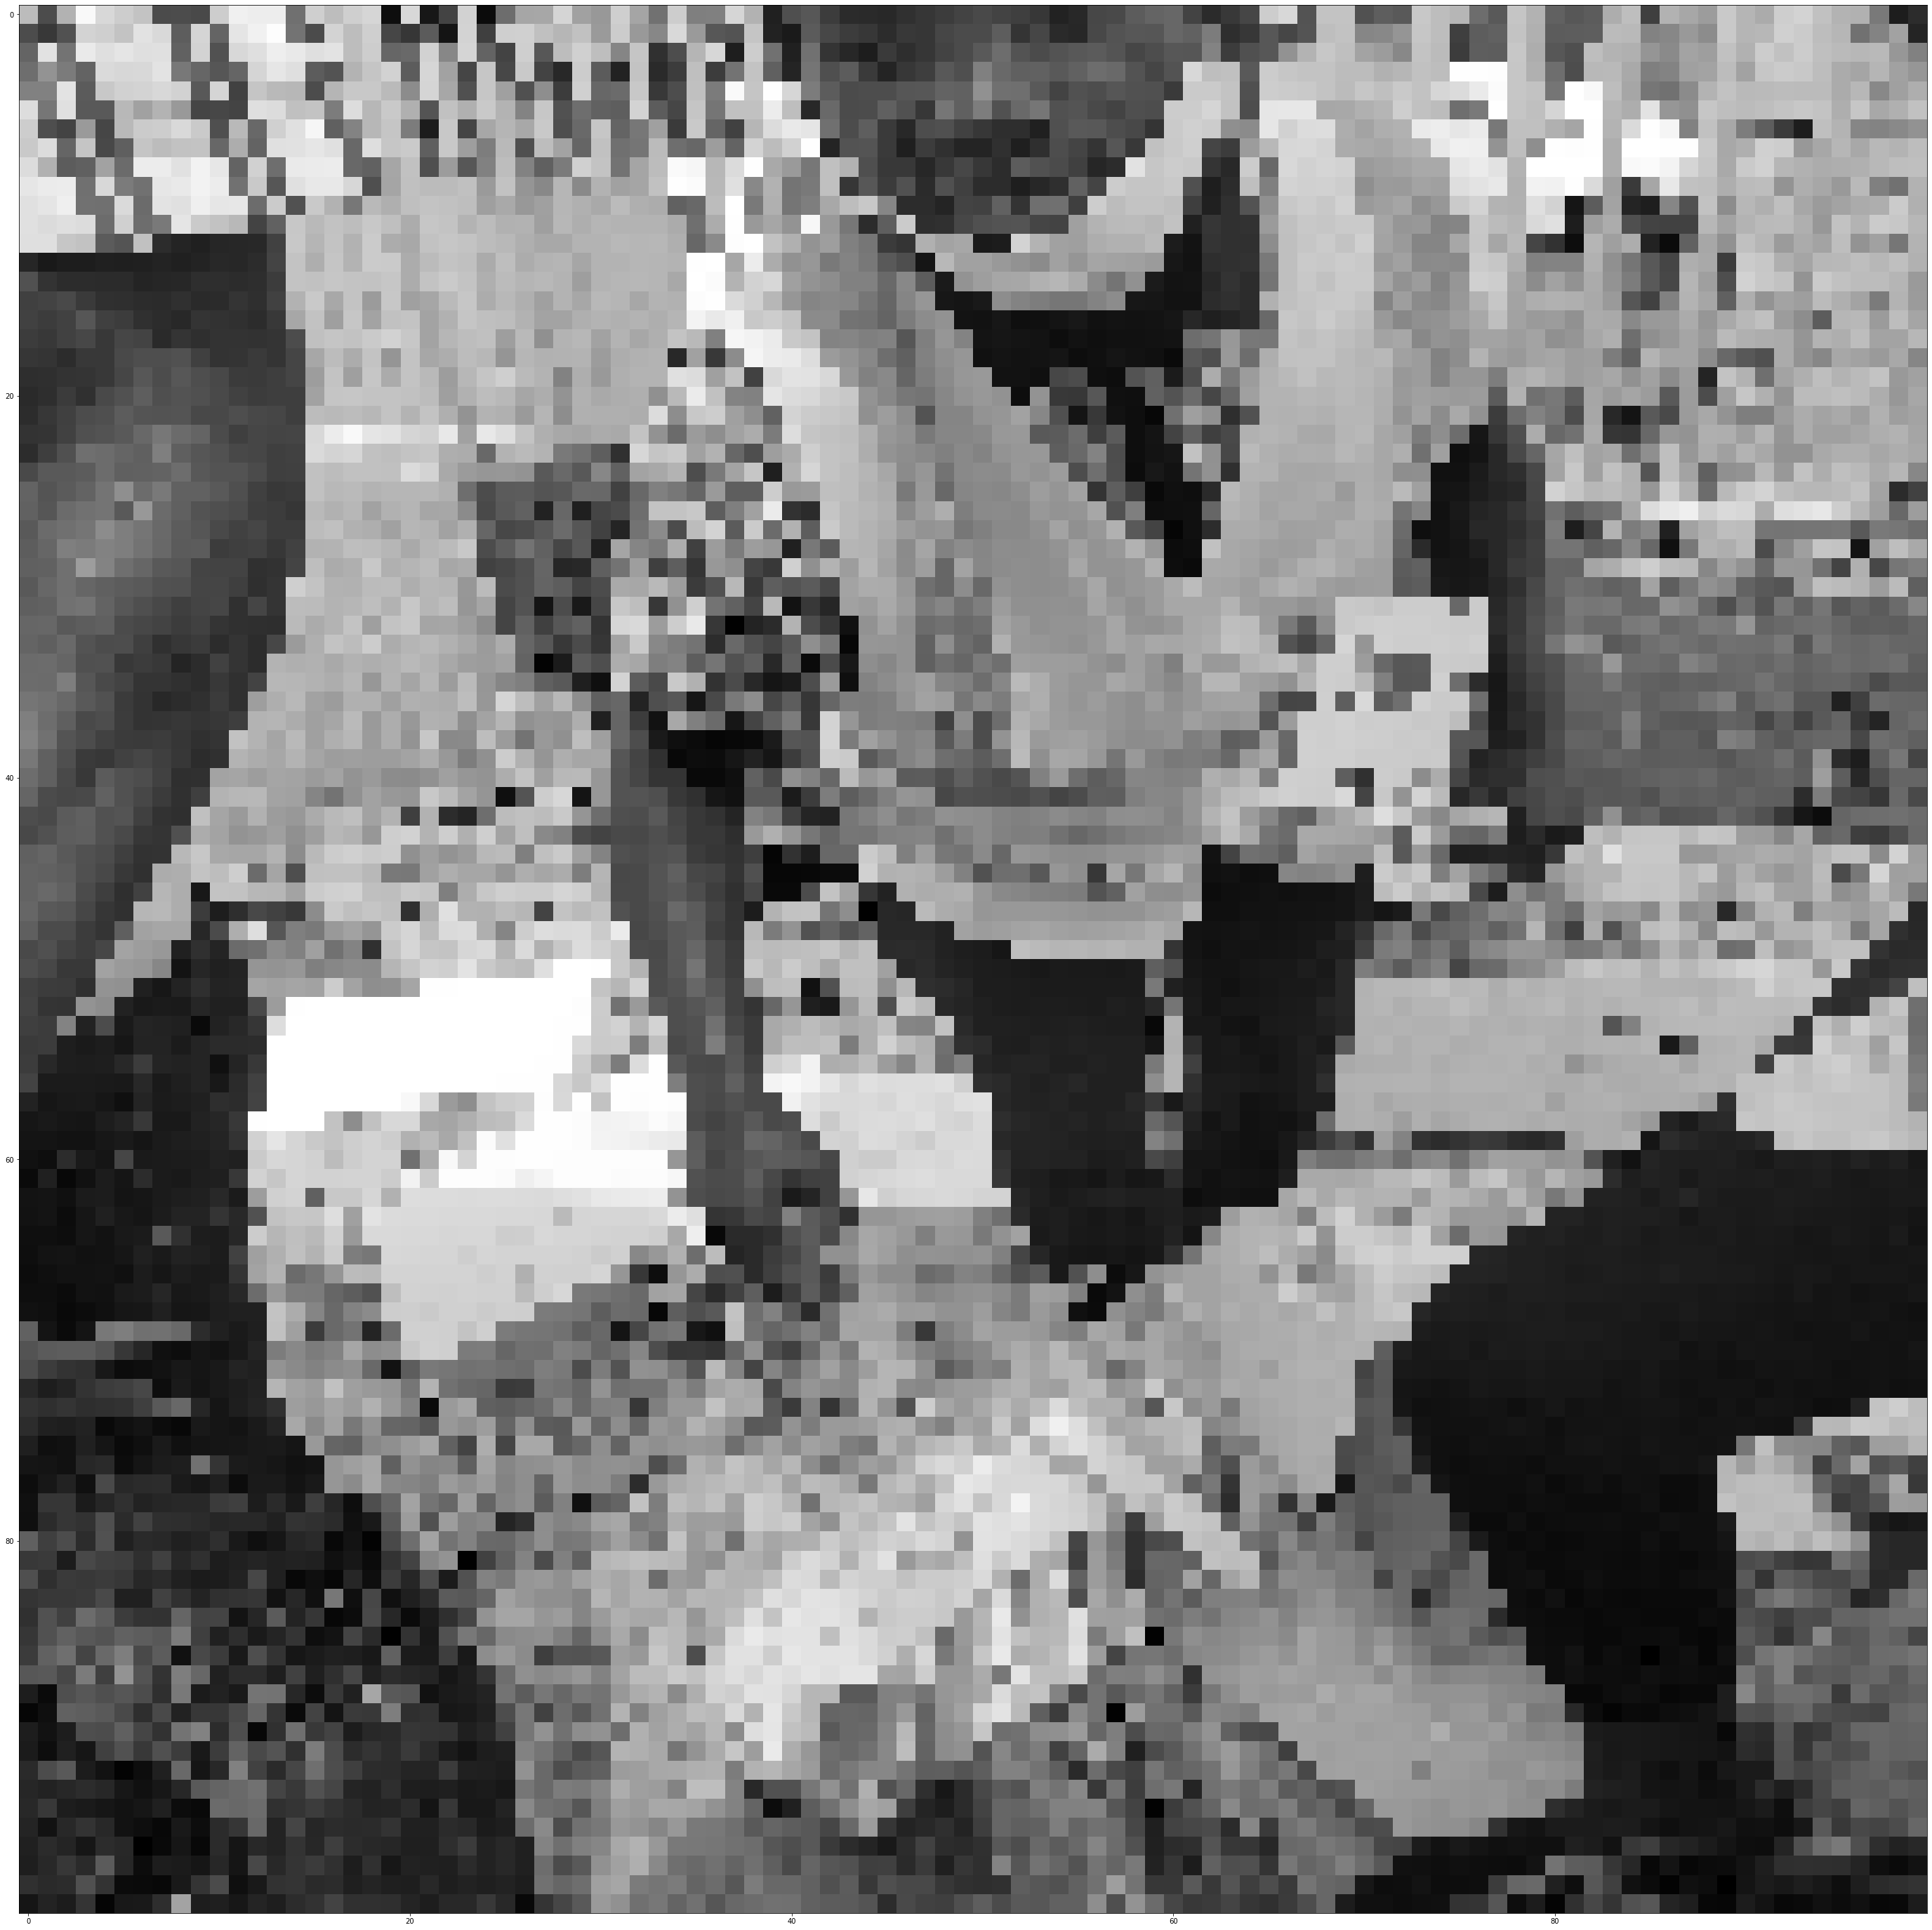

In [8]:
import matplotlib.pyplot as plt
plt.figure(figsize=(50,50))
plt.imshow(train[0][0],cmap='gray')
plt.show()

In [9]:
from tensorflow.keras.utils import to_categorical
featureSet, labels = caer.sep_train(train,IMG_SIZE=IMG_SIZE)
featureSet = np.array(featureSet)
print(featureSet.shape)
labels = np.array(labels)
labels = to_categorical(labels,len(characters))

(1690, 100, 100, 1)


In [10]:


featureSet = caer.normalize(featureSet)


In [11]:
# featureSet = np.squeeze(featureSet,axis=3).shape
print(featureSet)
labels.shape

[[[[0.7372549 ]
   [0.30588236]
   [0.69803923]
   ...
   [0.47843137]
   [0.12156863]
   [0.18039216]]

  [[0.30588236]
   [0.22745098]
   [0.32941177]
   ...
   [0.52156866]
   [0.6392157 ]
   [0.14901961]]

  [[0.39607844]
   [0.8862745 ]
   [0.45490196]
   ...
   [0.7254902 ]
   [0.59607846]
   [0.50980395]]

  ...

  [[0.1254902 ]
   [0.16470589]
   [0.22352941]
   ...
   [0.06666667]
   [0.04705882]
   [0.07843138]]

  [[0.2       ]
   [0.17254902]
   [0.18039216]
   ...
   [0.1764706 ]
   [0.19215687]
   [0.20784314]]

  [[0.09019608]
   [0.14509805]
   [0.11764706]
   ...
   [0.03921569]
   [0.04313726]
   [0.11764706]]]


 [[[0.6666667 ]
   [0.67058825]
   [0.627451  ]
   ...
   [0.78431374]
   [0.77254903]
   [0.77254903]]

  [[0.6627451 ]
   [0.65882355]
   [0.6431373 ]
   ...
   [0.7372549 ]
   [0.7372549 ]
   [0.7372549 ]]

  [[0.6666667 ]
   [0.6862745 ]
   [0.63529414]
   ...
   [0.74509805]
   [0.7529412 ]
   [0.76862746]]

  ...

  [[0.50980395]
   [0.49803922]
   [0.4

(1690, 3)

In [12]:
x_train, x_val, y_train, y_val = caer.train_val_split(featureSet,labels,val_ratio=.2)


In [13]:

type(x_train)
x_train = np.array(x_train)
y_train =np.array(y_train)
x_val = np.array(x_val)
y_val =np.array(y_val)


In [14]:
BATCH_SIZE=16
EPOCHS=20

In [15]:
datagen = canaro.generators.imageDataGenerator()
# x_train = np.squeeze(x_train,axis=1)
train_gen = datagen.flow(x_train,y_train,batch_size=BATCH_SIZE)

In [16]:
model = canaro.models.createSimpsonsModel(IMG_SIZE,channels=channels,output_dim=len(characters),loss='binary_crossentropy',decay=1e-6,learning_rate=0.001,momentum=0.9,nesterov=True)

In [17]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 100, 100, 32)      320       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 98, 98, 32)        9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 49, 49, 32)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 49, 49, 64)        18496     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 47, 47, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 23, 23, 64)       

In [18]:
from tensorflow.keras.callbacks import LearningRateScheduler
callbacks_list = [LearningRateScheduler(canaro.lr_schedule)]

In [19]:
training = model.fit(train_gen,steps_per_epoch=len(x_train)//BATCH_SIZE,epochs=EPOCHS,validation_data=(x_val,y_val),validation_steps=len(y_val)//BATCH_SIZE,callbacks=callbacks_list)

Epoch 1/20
84/84 [==============================] - 6s 34ms/step - loss: 0.6415 - accuracy: 0.4832 - val_loss: 0.6141 - val_accuracy: 0.4838
Epoch 2/20
84/84 [==============================] - 2s 22ms/step - loss: 0.5878 - accuracy: 0.4921
Epoch 3/20
84/84 [==============================] - 2s 21ms/step - loss: 0.4438 - accuracy: 0.7132
Epoch 4/20
84/84 [==============================] - 2s 21ms/step - loss: 0.4205 - accuracy: 0.7320
Epoch 5/20
84/84 [==============================] - 2s 22ms/step - loss: 0.3945 - accuracy: 0.7350
Epoch 6/20
84/84 [==============================] - 2s 22ms/step - loss: 0.3256 - accuracy: 0.7946
Epoch 7/20
84/84 [==============================] - 2s 24ms/step - loss: 0.2951 - accuracy: 0.8144
Epoch 8/20
84/84 [==============================] - 2s 21ms/step - loss: 0.2938 - accuracy: 0.8067
Epoch 9/20
84/84 [==============================] - 2s 21ms/step - loss: 0.2439 - accuracy: 0.8446
Epoch 10/20
84/84 [==============================] - 2s 22ms/step -

In [20]:
img_test = r'../input/projectdata/proj/Peter/IMG-20210313-WA0017 - Copy (3) - Copy - Copy.jpg'
img = cv.imread(img_test)
def prepare(img):
    img = cv.cvtColor(img,cv.COLOR_BGR2GRAY)
    img = cv.resize(img,IMG_SIZE)
    img = caer.reshape(img,IMG_SIZE,1)
    return img

In [21]:
predictions = model.predict(prepare(img))

In [22]:
print(characters[np.argmax(predictions[0])])
predictions


PETER


array([[0., 0., 1.]], dtype=float32)

In [23]:
model.save('model_.h5')